In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


### getting data

In [0]:
import bs4 as bs
import datetime as dt
import os
import pickle
import requests

import pandas as pd
import pandas_datareader.data as pdreader
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style

In [0]:
def get_1stock_data_from_yahoo(ticker):
  #tickers = save_sp500_tickers()
  start = dt.datetime(2010, 1, 1)
  end = dt.datetime.now()

  main_df = pd.DataFrame()

  df = pdreader.DataReader(ticker, 'yahoo', start, end)
      #df.reset_index(inplace = True)
  #df.rename(columns={'Adj Close': ticker}, inplace=True)
  #df.drop(['Open', 'High', 'Low', 'Close', 'Volume','Adj Close'], 1, inplace=True)


  print(df.head())
  print(df.tail())
  #main_df.to_csv('sp500_joined_closes.csv')
  
  return df
  
    

In [0]:
target_stock = ['AAPL', 'MSFT','GOOGL','AMZN','IBM']

In [6]:
AAPL_df = get_1stock_data_from_yahoo('AAPL')

                 High        Low       Open      Close       Volume  Adj Close
Date                                                                          
2010-01-04  30.642857  30.340000  30.490000  30.572857  123432400.0  26.782711
2010-01-05  30.798571  30.464285  30.657143  30.625713  150476200.0  26.829010
2010-01-06  30.747143  30.107143  30.625713  30.138571  138040000.0  26.402260
2010-01-07  30.285715  29.864286  30.250000  30.082857  119282800.0  26.353460
2010-01-08  30.285715  29.865715  30.042856  30.282858  111902700.0  26.528664
                  High         Low  ...      Volume   Adj Close
Date                                ...                        
2019-07-22  207.229996  203.610001  ...  22277900.0  207.220001
2019-07-23  208.910004  207.289993  ...  18355200.0  208.839996
2019-07-24  209.149994  207.169998  ...  14991600.0  208.669998
2019-07-25  209.240005  206.729996  ...  13909600.0  207.020004
2019-07-26  209.729996  207.139999  ...  17601200.0  207.740005

In [0]:
AAPL_learndf = AAPL_df[AAPL_df.index < '2019-01-01']

In [0]:
AAPL_learndf = AAPL_df

# preprocessing

In [0]:
%matplotlib inline

import math
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import time

from datetime import date, datetime, time, timedelta
from matplotlib import pyplot as plt
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from tqdm import tqdm_notebook



In [0]:
df_test = AAPL_df[AAPL_df.index >= '2019-01-01']['Adj Close'].reset_index()
df = AAPL_df[AAPL_df.index < '2019-01-01'].reset_index()

In [10]:
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
2259,2018-12-24,151.550003,146.589996,148.149994,146.830002,37169200.0,145.642090
2260,2018-12-26,157.229996,146.720001,148.300003,157.169998,58582500.0,155.898438
2261,2018-12-27,156.770004,150.070007,155.839996,156.149994,53117100.0,154.886688
2262,2018-12-28,158.520004,154.550003,157.500000,156.229996,42291400.0,154.966034
2263,2018-12-31,159.360001,156.479996,158.529999,157.740005,35003500.0,156.463837


In [0]:
# Change all column headings to be lower case, and remove spacing
df.columns = [str(x).lower().replace(' ', '_') for x in df.columns]

# Get month of each sample
df['month'] = df['date'].dt.month

Text(0, 0.5, 'USD')

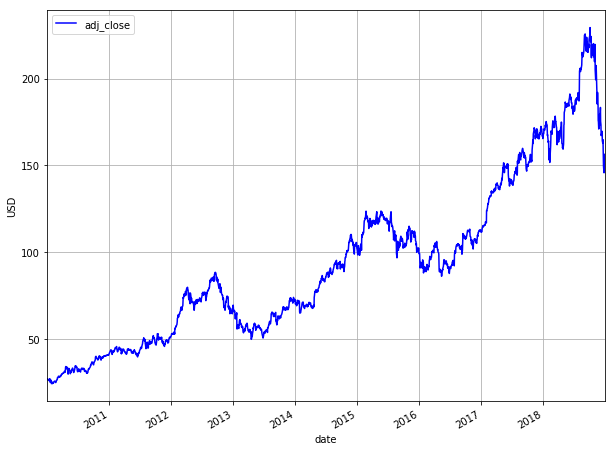

In [12]:
# Plot adjusted close over time
plt.rcParams["figure.figsize"] = (10,8)# width 10, height 8

ax = df.plot(x='date', y='adj_close', style='b-', grid=True)
ax.set_xlabel("date")
ax.set_ylabel("USD")

## Split into train, dev and test set

In [0]:
# splitting parameter
test_size = 0.07                 # proportion of dataset to be used as test set
cv_size = 0.15                   # proportion of dataset to be used as cross-validation set



In [17]:
# Get sizes of each of the datasets
num_cv = int(cv_size*len(df))
num_test = int(test_size*len(df))
num_train = len(df) - num_cv - num_test
print("num_train = " + str(num_train))
print("num_cv = " + str(num_cv))
print("num_test = " + str(num_test))

# Split into train, cv, and test
train = df[:num_train]
cv = df[num_train:num_train+num_cv]
train_cv = df[:num_train+num_cv]
test = df[num_train+num_cv:]
print("train.shape = " + str(train.shape))
print("cv.shape = " + str(cv.shape))
print("train_cv.shape = " + str(train_cv.shape))
print("test.shape = " + str(test.shape))

num_train = 1767
num_cv = 339
num_test = 158
train.shape = (1767, 8)
cv.shape = (339, 8)
train_cv.shape = (2106, 8)
test.shape = (158, 8)


Text(0, 0.5, 'USD')

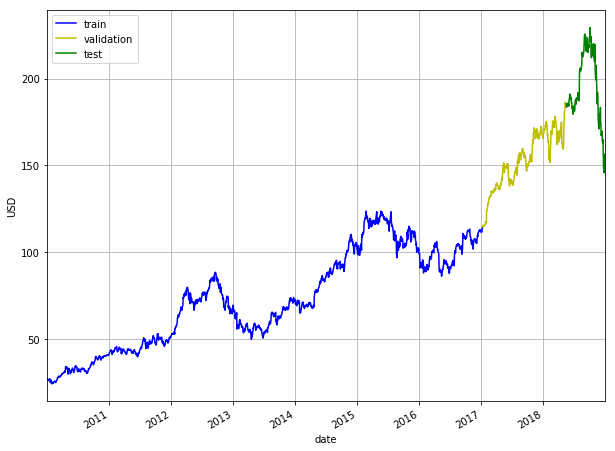

In [19]:
# Plot adjusted close over time
plt.rcParams["figure.figsize"] = (10,8)# width 10, height 8

ax = train.plot(x='date', y='adj_close', style='b-', grid=True)
ax = cv.plot(x='date', y='adj_close', style='y-', grid=True, ax=ax)
ax = test.plot(x='date', y='adj_close', style='g-', grid=True, ax=ax)
ax.legend(['train', 'validation', 'test'])
ax.set_xlabel("date")
ax.set_ylabel("USD")



# model function

In [0]:
def get_preds_mov_avg(df, target_col, N, pred_min, offset):
    """
    Given a dataframe, get moving prediction at timestep t using values from t-1, t-2, ..., t-N.
    Using simple moving average.
    Inputs
        df         : dataframe with the values you want to predict. Can be of any length.
        target_col : name of the column you want to predict e.g. 'adj_close'
        N          : get prediction at timestep t using values from t-1, t-2, ..., t-N
        pred_min   : all predictions should be >= pred_min
        offset     : for df we only do predictions for df[offset:]. e.g. offset can be size of training set
    Outputs
        pred_list  : list. The predictions for target_col. np.array of length len(df)-offset.
    """
    pred_list = df[target_col].rolling(window = N, min_periods=1).mean() # len(pred_list) = len(df)
    
    # Add one timestep to the predictions
    pred_list = np.concatenate((np.array([np.nan]), np.array(pred_list[:-1])))
    
    # If the values are < pred_min, set it to be pred_min
    pred_list = np.array(pred_list)
    pred_list[pred_list < pred_min] = pred_min
    
    return pred_list[offset:]

def get_mape(y_true, y_pred): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

## tunning days of moving 

In [0]:
Nmax = 21                       # for feature at day t, we use lags from t-1, t-2, ..., t-N as features
                                # Nmax is the maximum N we are going to test
fontsize = 14
ticklabelsize = 14

In [20]:
RMSE = []
mape = []
for N in range(1, Nmax+1): # N is no. of samples to use to predict the next value
    est_list = get_preds_mov_avg(train_cv, 'adj_close', N, 0, num_train)
    
    cv['est' + '_N' + str(N)] = est_list
    RMSE.append(math.sqrt(mean_squared_error(est_list, cv['adj_close'])))
    mape.append(get_mape(cv['adj_close'], est_list))
print('RMSE = ' + str(RMSE))
print('MAPE = ' + str(mape))
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in less
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in less
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value

RMSE = [2.042274252602091, 2.3659150717352113, 2.672776710430538, 2.975090832125124, 3.29313804292502, 3.600452879585142, 3.8790010219668623, 4.139884987875983, 4.364185296432394, 4.5654689780441515, 4.751655064387462, 4.919685320728706, 5.067122365047174, 5.195862574806151, 5.3117927340262385, 5.416206337202034, 5.514121489194334, 5.608463096993623, 5.702861295217226, 5.799680139169778, 5.897328227269195]
MAPE = [0.9072291679543807, 1.0443701936786802, 1.2087506291599146, 1.365770889648374, 1.5344034063850847, 1.6872012957980256, 1.8242311179272546, 1.959253137799701, 2.070830882541517, 2.1726068688493267, 2.267559226074095, 2.3580531127993622, 2.441764261535641, 2.522021821783428, 2.606435110565913, 2.689617849696322, 2.769246600072689, 2.849393701174696, 2.9270365233050843, 3.000862515087797, 3.075487186618814]


,date,high,low,open,close,volume,adj_close,month
0,2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.782711,1
1,2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.829010,1
2,2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.402260,1
3,2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.353460,1
4,2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.528664,1


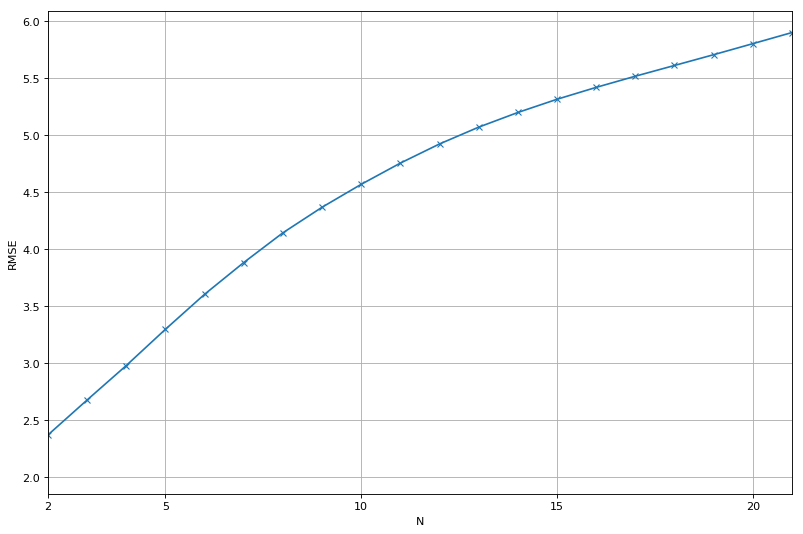

In [21]:
# Plot RMSE versus N
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(1, Nmax+1), RMSE, 'x-')
plt.grid()
plt.xlabel('N')
plt.ylabel('RMSE')
plt.xlim([2, 21])
plt.xticks([2, 5, 10, 15, 20])
matplotlib.rcParams.update({'font.size': 14})

([<matplotlib.axis.XTick at 0x7f3a83a5b898>,
 <a list of 5 Text xticklabel objects>)

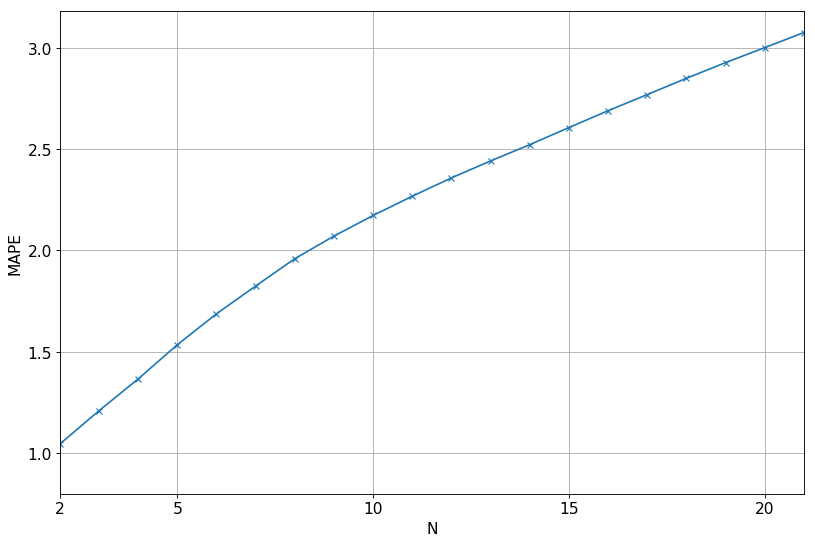

In [22]:
# Plot MAPE versus N. Note for MAPE smaller better. 
plt.figure(figsize=(12, 8), dpi=80)
plt.plot(range(1, Nmax+1), mape, 'x-')
plt.grid()
plt.xlabel('N')
plt.ylabel('MAPE')
plt.xlim([2, 21])
plt.xticks([2, 5, 10, 15, 20])

In [0]:
# Set optimum N
N_opt = 2

(110, 190)

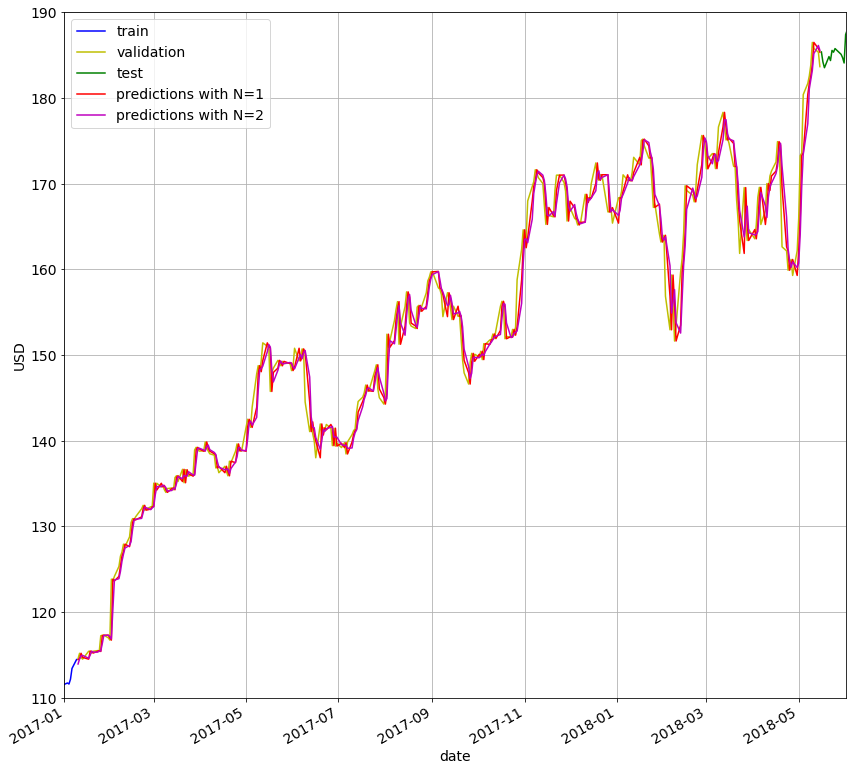

In [31]:
# Plot adjusted close over time
rcParams['figure.figsize'] = 14, 14 # width 10, height 8

ax = train.plot(x='date', y='adj_close', style='b-', grid=True)
ax = cv.plot(x='date', y='adj_close', style='y-', grid=True, ax=ax)
ax = test.plot(x='date', y='adj_close', style='g-', grid=True, ax=ax)
ax = cv.plot(x='date', y='est_N1', style='r-', grid=True, ax=ax)
ax = cv.plot(x='date', y='est_N2', style='m-', grid=True, ax=ax)
ax.legend(['train', 'validation', 'test', 'predictions with N=1', 'predictions with N=2'])
ax.set_xlabel("date")
ax.set_ylabel("USD")
ax.set_xlim([date(2017, 1, 1), date(2018, 6, 1)]) #2017-08-25 2018-12-31
ax.set_ylim([110, 190])


# Final model

In [38]:
est_list = get_preds_mov_avg(df, 'adj_close', N_opt, 0, num_train+num_cv)
test['est' + '_N' + str(N_opt)] = est_list
print("RMSE = %0.3f" % math.sqrt(mean_squared_error(est_list, test['adj_close'])))
print("MAPE = %0.3f%%" % get_mape(test['adj_close'], est_list))
test.head()

RMSE = 4.049
MAPE = 1.506%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in less
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,date,high,low,open,close,volume,adj_close,month,est_N2
2106,2018-05-16,188.460007,186.000000,186.070007,188.179993,19183100.0,185.358475,5,184.486748
2107,2018-05-17,188.910004,186.360001,188.000000,186.990005,17294000.0,184.186310,5,184.501526
2108,2018-05-18,187.809998,186.130005,187.190002,186.309998,18297700.0,183.516510,5,184.772392
2109,2018-05-21,189.270004,186.910004,188.000000,187.630005,18400800.0,184.816711,5,183.851410
2110,2018-05-22,188.880005,186.779999,188.380005,187.160004,15240700.0,184.353760,5,184.166611


(140, 250)

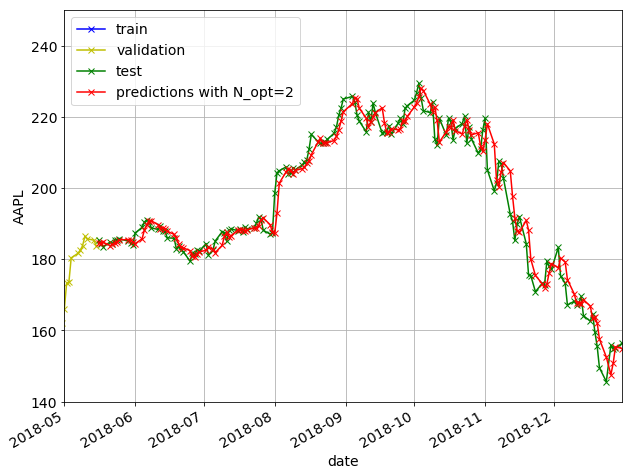

In [37]:
# Plot adjusted close over time
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

ax = train.plot(x='date', y='adj_close', style='bx-', grid=True)
ax = cv.plot(x='date', y='adj_close', style='yx-', grid=True, ax=ax)
ax = test.plot(x='date', y='adj_close', style='gx-', grid=True, ax=ax)
ax = test.plot(x='date', y='est_N2', style='rx-', grid=True, ax=ax)
ax.legend(['train', 'validation', 'test', 'predictions with N_opt=2'])
ax.set_xlabel("date")
ax.set_ylabel("AAPL")
ax.set_xlim([date(2018, 5, 1), date(2018, 12, 31)])
ax.set_ylim([140, 250])
#ax.set_title('Zoom in to test set')